In [19]:
#import python libraries and csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\SUMERINA\Downloads\COGNIFYZ_Sumerina\Dataset .csv", encoding= 'unicode_escape')

In [3]:
print(df['Rating text'])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


Task 1 : Restaurant Reviews

Analyze the text reviews to identify the most
common positive and negative keywords.


FOR THE POSITIVE REVIEWS

In [4]:
positive_data = df.loc[df['Aggregate rating'] >= 2.5]
print(positive_data)

      ï»¿Restaurant ID           Restaurant Name  Country Code  \
0              6317637          Le Petit Souffle           162   
1              6304287          Izakaya Kikufuji           162   
2              6300002    Heat - Edsa Shangri-La           162   
3              6318506                      Ooma           162   
4              6314302               Sambo Kojin           162   
...                ...                       ...           ...   
9546           5915730              NamlÛ± Gurme           208   
9547           5908749         Ceviz Aï¿½ï¿½acÛ±           208   
9548           5915807                     Huqqa           208   
9549           5916112         Aï¿½ï¿½ï¿½k Kahve           208   
9550           5927402  Walter's Coffee Roastery           208   

                  City                                            Address  \
0          Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1          Makati City  Little Tokyo, 2277 Chino Roce

In [5]:
positive_keywords = positive_data['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


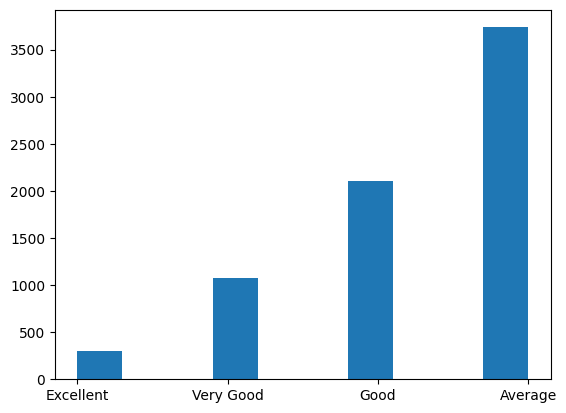

In [6]:
plt.hist(positive_data['Rating text'], label=positive_keywords)
plt.show()


FOR THE NEGATIVE REVIEWS

In [7]:
negative_data = df.loc[(df['Aggregate rating'] < 2.5) & (df['Aggregate rating'] > 0)]
negative_keywords = negative_data['Rating text'].unique()
print(negative_keywords)

['Poor']


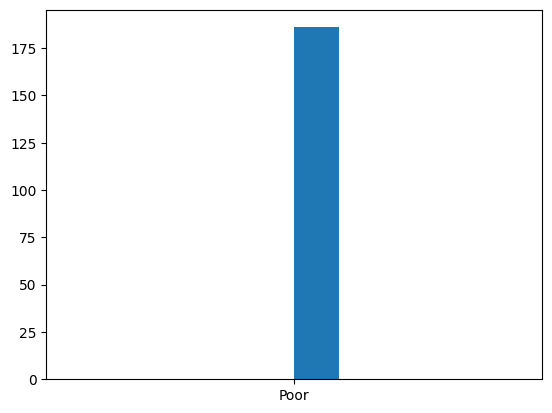

In [8]:
plt.hist(negative_data['Rating text'], label=negative_keywords)
plt.show()

Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [14]:
#Measuring the length of reviews(Rating text) and calculate the avg length
df['Review_length'] = df['Rating text'].astype(str).apply(len)
average_length = df['Review_length'].mean()
print(f"\nAverage Review Length : {average_length:.2f} characters")


Average Review Length : 7.02 characters


In [18]:
#Measuring the counts of reviews(Rating text)
Review_counts = df['Rating text'].value_counts()
print("Review Type Counts : \n", Review_counts)

Review Type Counts : 
 Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64


In [15]:
#Mapping rating categories to numeric ratings for analysis
rating_map={
    "Not Rated": 0, "Poor": 1, "Average": 2, "Good": 3, "Very Good": 4, "Excellent": 5
}
df['rating_score']=df['Rating text'].map(rating_map)

In [16]:
#checking if longer reviews tend to have better ratings
correlation = df[['Review_length', 'rating_score']].corr().iloc[0,1]
print(f"\nCorrelation between review length and rating :{correlation:.2f}")



Correlation between review length and rating :0.26


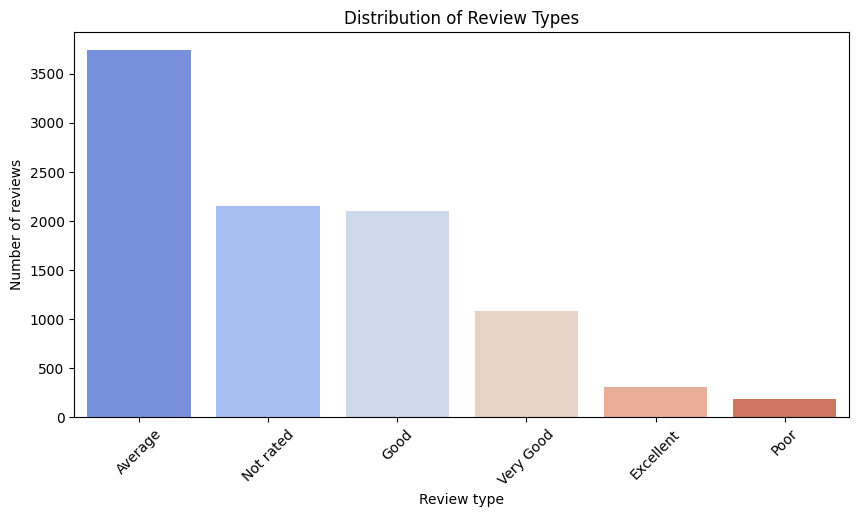

In [21]:
#bar chart visualization
plt.figure(figsize=(10,5))
sns.barplot(x=Review_counts.index, y=Review_counts.values, hue=Review_counts.index, palette="coolwarm", legend=False)
plt.xlabel("Review type")
plt.ylabel("Number of reviews")
plt.title("Distribution of Review Types")
plt.xticks(rotation=45)
plt.show()